# Calculation of Clebsch-Gordan Coefficients

In [1]:
%load_ext autoreload
%autoreload 2
from qdef import *
%config Completer.use_jedi = False
import sympy as sp
sp.init_session(quiet=True)
from itertools import product

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

/Users/juan/Google Drive/Zia Lab/Codebase/qdef/data/CPGs.pkl not found, regenerating ...



Given a point symmetry group and function bases $\phi(\Gamma_1 \gamma_i)$ and $\phi(\Gamma_2 \gamma_j)$ for two of its irreducible representations $\Gamma_1$ and $\Gamma_2$, the space of product functions that may be spanned with these two bases can be decomposed into a direct sum of subspaces each of which belongs to one of the irreducible representions obtained from the decomposition of the product $\Gamma_1 \otimes \Gamma_2$ into a direct sum $\Gamma_1 \otimes \Gamma_2 = \sum_j \Gamma_{3,j}$.

$\Psi(\Gamma_3 \gamma_3) = \sum_{\gamma_1, \gamma_2} \langle \Gamma_1\gamma_1 \Gamma_2\gamma2 | \Gamma _3\gamma_3 \rangle \phi(\Gamma_1 \gamma_1) \phi(\Gamma_2 \gamma_2)$ with $(\Gamma_3, \gamma_3)$ one of the $(\Gamma_{3,j},\gamma_{3,j})$. These will be linear combinations of the simple products.

In other words, a new set of function bases may be created from the original ones, such that they transform as one of the irreducible representations ${\Gamma}_{3,j}$ contained in $\Gamma_1 \otimes \Gamma_2$.

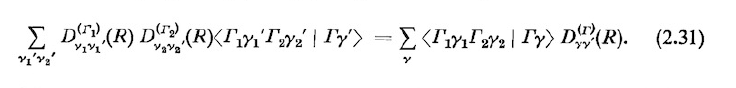

The Clebsch-Gordan coefficients are constrained by a set of linear constraints and by a unitarity restriction.

The linear constraints are:

\begin{equation}
\sum_{\gamma_1', \gamma_2'} D_{\gamma_1 \gamma_1'}^{(\Gamma_1)}(R)\,D_{\gamma_2 \gamma_2'}^{(\Gamma_2)}(R) \langle \Gamma_1 \gamma_1' \Gamma_2 \gamma_2' | \Gamma_3 \gamma_3' \rangle = \sum_{\gamma_3} \langle \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 | \Gamma_3 \gamma_3 \rangle D_{\gamma_3 \gamma_3'}^{(\Gamma_3)} \left(R\right) \,\,\,\,\textrm{(TSK 2.31)}
\end{equation}

Where each individual constraint is determined by a combination of $(R, \gamma_1(R), \gamma_2(R), \Gamma_3, \gamma_3'(R))$, where $R$ equals one of the group's generating elements (if other group elements are used, they provide redundant constraints).

The unitarity constraints are:

\begin{align}
\sum_{\gamma_1\gamma_2} \langle \Gamma_3 \gamma_3 | \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 \rangle \langle \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 | \Gamma_3' \gamma_3' \rangle &= \delta(\Gamma_3 \Gamma_3') \delta(\gamma_3 \gamma_3') \,\,\,\,\textrm{(TSK 2.28)}\\ 
\sum_{\Gamma \gamma} \langle \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 | \Gamma_3 \gamma_3 \rangle \langle \Gamma_3 \gamma_3 | \Gamma_1 \gamma_1' \Gamma_2 \gamma_2' \rangle &= \delta(\gamma_1\gamma_1')\delta(\gamma_2\gamma_2') \,\,\,\,\textrm{(TSK 2.29)}
\end{align}

## O - group

In [2]:
grup_opts = {k:CPGs.get_group_by_label(k).irrep_labels for k in CPGs.all_group_labels}

def print_cg(group, irrep_0, irrep_1):
    display(group_clebsch_gordan_coeffs(CPGs.get_group_by_label(group), irrep_0, irrep_1, rep_rules=False)[2])

def select_group(group):
    irrepW_0.options = grup_opts[group]
    irrepW_1.options = grup_opts[group]  

group_pick = widgets.Dropdown(options=['O'], value='O')
init = group_pick.value
irrepW_0 = widgets.Dropdown(options=grup_opts[init])
irrepW_1 = widgets.Dropdown(options=grup_opts[init])
widgets.interactive(select_group, group=group_pick)
j = widgets.interactive(print_cg, group=group_pick, irrep_0=irrepW_0, irrep_1=irrepW_1)
display(j)

interactive(children=(Dropdown(description='group', options=('O',), value='O'), Dropdown(description='irrep_0'…

In [3]:
all_cgs = {}
group = CPGs.get_group_by_label('O')
for irep1, irep2 in list(product(grup_opts['O'],grup_opts['O'])):
    if (irep1, irep2) in all_cgs.keys():
        continue
    if (irep2, irep1) in all_cgs.keys():
        continue
    cgs = group_clebsch_gordan_coeffs(group, irep1, irep2, rep_rules=True)
    if irep1 == irep2:
        all_cgs[(irep1, irep2)] = cgs[0]
    else:
        all_cgs[(irep1, irep2)] = cgs[0]
        all_cgs[(irep2, irep2)] = cgs[1]

In [10]:
sp.symbols("x y")

In [18]:
sp.kron

In [4]:
component_labels = group.component_labels
labels_1 = component_labels[irep1]
labels_2 = component_labels[irep2]
irep3s = group.product_table.odict[(irep1, irep2)]
irep3 = irep3s[0]
labels_3 = component_labels[irep3]
cg_symbol(component_labels[irep1][0],
          component_labels[irep2][0],
          irep3s[0],
          labels_3[0]
         )

## all other groups

In [14]:
grup_opts = {k:CPGs.get_group_by_label(k).irrep_labels for k in CPGs.all_group_labels}

def print_cg(group, irrep_0, irrep_1):
    display(group_clebsch_gordan_coeffs(CPGs.get_group_by_label(group), irrep_0, irrep_1, rep_rules=False)[2])

def select_group(group):
    irrepW_0.options = grup_opts[group]
    irrepW_1.options = grup_opts[group]  

group_pick = widgets.Dropdown(options=CPGs.all_group_labels, value='O')
init = group_pick.value
irrepW_0 = widgets.Dropdown(options=grup_opts[init])
irrepW_1 = widgets.Dropdown(options=grup_opts[init])
widgets.interactive(select_group, group=group_pick)
j = widgets.interactive(print_cg, group=group_pick, irrep_0=irrepW_0, irrep_1=irrepW_1)
display(j)

interactive(children=(Dropdown(description='group', index=29, options=('C_{1}', 'C_{i}', 'C_{2}', 'C_{s}', 'C_…

In [26]:
group = CPGs.get_group_by_label('O')
irrep1, irrep2 = irreps[1], irreps[2]
print(irrep1, irrep2)
CGs = group_clebsch_gordan_coeffs(group, irrep1, irrep2)

A_2 E


## Spaguetti code

In [15]:
group = CPGs.get_group_by_label('O_{h}')
irreps = group.irrep_labels

In [17]:
all_irrep_labels = []
for group_idx, group in CPGs.groups.items():
#     all_irrep_labels.extend(group.irrep_labels)
#     display(sp.Symbol(group.label))
#     display(group.irrep_labels)
    all_irrep_labels.extend(group.irrep_labels)
    group.irrep_dims = {k: list(v.values())[0].shape[0] for k, v in group.irrep_matrices.items()}
# all_irrep_labels = list(set(all_irrep_labels))

In [18]:
def determinator(irrep_label):
    str_label = str(irrep_label)
    options = ['A', 'B', 'Gamma', 'E', 'T']  
    totals = sum(list(map(lambda x: 1 if x in str_label else 0, options)))
    if totals == 1:
        return True
    else:
        return str_label

In [19]:
def get_basis_function_labels(group):
    irrep_dims = group.irrep_dims
    components = {}
    for irrep_label, irrep_dim in irrep_dims.items():
        str_label = str(irrep_label)
        c_labels = []
        if irrep_dim == 1:
            c_labels = [sp.Symbol('a_{%s}' % str_label)]
        elif irrep_dim == 2:
            c_labels = [sp.Symbol('u_{%s}' % str_label), 
                        sp.Symbol('v_{%s}' % str_label)]
        elif irrep_dim == 3:
            c_labels = [sp.Symbol('x_{%s}' % str_label),
                        sp.Symbol('y_{%s}' % str_label),
                        sp.Symbol('z_{%s}' % str_label)]
        assert len(c_labels) != 0
        components[irrep_label] = c_labels
    return components

In [20]:
group = CPGs.get_group_by_label('O')
irreps = group.irrep_labels
irreps

In [22]:
for group_label, group in CPGs.groups.items():
    group.basis_function_labels = get_basis_function_labels(group)

In [21]:
group = CPGs.get_group_by_label('O')
irreps = group.irrep_labels
irep1, irep2 = irreps[3], irreps[3]
# must first find the resulting direct sum decomposition of their product
irep3s = list(group.product_table.odict[(irep1, irep2)].args)
# also need to grab the labels for a set of generators
generators = group.generators
# to understand the results it is also necessary to have
# a good set of labels for the basis functions is neede
# for each irreducible representations
# to make this compatible with the STK notation
# I shall make the following identification
# the ordering will most likely be off
all_labels = [[sp.Symbol("e_1")],
             [sp.Symbol("e_2")],
             [sp.Symbol("u"), sp.Symbol("v")],
             [sp.Symbol(r"\alpha"), sp.Symbol(r"\beta"), sp.Symbol(r"\gamma")],
             [sp.Symbol(r"\xi"), sp.Symbol(r"\eta"), sp.Symbol(r"\zeta")]]
basis_labels = {k: labels for k, labels in zip(irreps, all_labels)}
print("Grabbing the labels for the basis functions ...")
labels_1, labels_2 = basis_labels[irep1], basis_labels[irep2]
print("CG is a ({size},{size}) matrix ...".format(size=len(labels_1)*len(labels_2)))
generators_1 = [group.irrep_matrices[irep1][g] for g in generators]
generators_2 = [group.irrep_matrices[irep2][g] for g in generators]

# then create the list of linear constraints
print("Creating the set of linear constraints ...")
# In (2.31) there are five quantities that determine one constraints
all_eqns = []
for irep3 in irep3s:
    labels_3 = basis_labels[irep3]
    for generator in generators:
        D1, D2, D3 = [group.irrep_matrices[irep][generator] for irep in [irep1,irep2,irep3]]
        γ1s, γ2s, γ3s = [list(range(D.shape[0])) for D in [D1,D2,D3]]
        for γ1, γ2, γ3p in product(γ1s, γ2s, γ3s):
            lhs = []
            for γ1p in γ1s:
                for γ2p in γ2s:
                    symb_args = (labels_1[γ1p],labels_2[γ2p],irep3,labels_3[γ3p])
                    chevron = sp.Symbol(r"\langle%s,%s|%s,%s{\rangle}" % symb_args)     
                    coeff = D1[γ1, γ1p]*D2[γ2,γ2p]
                    if coeff:
                        lhs.append(coeff*chevron)
            lhs = sum(lhs)
            rhs = []
            for γ3 in γ3s:
                symb_args = (labels_1[γ1],labels_2[γ2],irep3,labels_3[γ3])
                chevron = sp.Symbol(r"\langle%s,%s|%s,%s{\rangle}" % symb_args)
                coeff = D3[γ3, γ3p]
                if coeff:
                    rhs.append(coeff*chevron)
            rhs = sum(rhs)
            eqn = rhs-lhs
            if (eqn not in all_eqns) and (-eqn not in all_eqns) and (eqn != 0):
                all_eqns.append(eqn)

# collect all the symbols included in all_eqns
free_symbols = set()
for eqn in all_eqns:
    free_symbols.update(eqn.free_symbols)
free_symbols = list(free_symbols)
print("There are %d different CGs in the linear constraint equations ..." % len(free_symbols))

# convert to matrix of coefficients
coef_matrix = Matrix([[eqn.coeff(cg) for cg in free_symbols] for eqn in all_eqns])
# and simplify using the rref
rref = coef_matrix.rref()[0]
# turn back to symbolic and solve
better_eqns = [r for r in rref*sp.Matrix(free_symbols) if r!=0]
better_sol = sp.solve(better_eqns, free_symbols)
# construct the unitary matrix with all the CGs
print("Building the big bad matrix ...")
U = []
for γ1 in labels_1:
    for γ2 in labels_2:
        row = []
        for irep3 in irep3s:
            labels_3 = basis_labels[irep3]
            for γ3 in labels_3:
                chevron = sp.Symbol(r"\langle%s,%s|%s,%s{\rangle}" % (γ1, γ2, irep3, γ3))
                row.append(chevron)
        U.append(row)
Usymbols = sp.Matrix(U)
# replace with the solution to the linear constraints
U = Usymbols.subs(better_sol)
# build the unitary constraints
print("Bulding the unitarity constraints and assuming U to be orthogonal ...")
unitary_constraints = U*U.T - eye(U.shape[0])
# flatten and pick the nontrivial ones
unitary_set = [f for f in flatten_matrix(unitary_constraints) if f!=0]
# solve
unitary_sol = sp.solve(unitary_set)
print("%d solutions found ..." % len(unitary_sol))
Usols = [U.subs(sol) for sol in unitary_sol]

Grabbing the labels for the basis functions ...
CG is a (9,9) matrix ...
Creating the set of linear constraints ...
There are 81 different CGs in the linear constraint equations ...
Building the big bad matrix ...
Bulding the unitarity constraints and assuming U to be orthogonal ...
16 solutions found ...
